# Datos Basados por la NASA
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl#ed-firms-attributes


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('fire_nrt_J1V-C2_157472.csv')
dataset.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,8.46846,-80.58140,334.2,0.48,0.40,2020-01-03,1854,1,VIIRS,n,2.0NRT,300.5,2.0,D
1,8.63789,-80.05302,303.2,0.45,0.63,2020-01-04,730,1,VIIRS,n,2.0NRT,288.7,0.8,N
2,8.37371,-80.43045,331.3,0.40,0.37,2020-01-04,1836,1,VIIRS,n,2.0NRT,303.1,2.4,D
3,8.38561,-80.66351,341.0,0.40,0.37,2020-01-04,1836,1,VIIRS,n,2.0NRT,302.4,3.7,D
4,8.44208,-81.80720,334.7,0.44,0.38,2020-01-04,1836,1,VIIRS,n,2.0NRT,303.3,5.9,D


# Campos del CSV

Latitude: Centro de 1km de pixel de fuego pero no necesariamente la ubicación real del fuego ya que uno o más incendios pueden ser detectados dentro del pixel de 1km.

Longitude: Centro de 1km de pixel de fuego pero no necesariamente la ubicación real del fuego ya que uno o más incendios pueden ser detectados dentro del pixel de 1km.

Brightness: Canal 21/22 temperatura de brillo del píxel de fuego medido en Kelvin.

Scan: El algoritmo produce píxeles de fuego de 1 km, pero los píxeles de MODIS se hacen más grandes hacia el borde de la exploración. El escaneo y el rastreo reflejan el tamaño real de los píxeles.

Track: El algoritmo produce píxeles de fuego de 1 km, pero los píxeles de MODIS se hacen más grandes hacia el borde de la exploración. El escaneo y el rastreo reflejan el tamaño real de los píxeles.

Acq_Date: Datos de la adquisición de MODIS.

Acq_Time: Tiempo de adquisición/sobrepaso del satélite (en UTC).

Satellite: A= Aqua y T= Terra

Confidence: Este valor se basa en una colección de cantidades de algoritmos intermedios utilizados en el proceso de detección. Tiene por objeto ayudar a los usuarios a calibrar la calidad de los píxeles individuales de puntos calientes/fuego. Las estimaciones de confianza oscilan entre el 0 y el 100% y se les asigna una de las tres clases de fuego (fuego de baja confianza, fuego de confianza nominal o fuego de alta confianza).

Version: La versión identifica la colección (por ejemplo, la colección MODIS 6) y la fuente del procesamiento de datos: Near Real-Time (sufijo NRT añadido a la colección) o Standard Processing (sólo la colección).
"6.0NRT" - Procesamiento NRT de la Colección 6.
"6.0" - Procesamiento estándar de la Colección 6. Más información sobre las colecciones y sobre las diferencias entre los datos de FIRMS procedentes de LANCE FIRMS y de la Universidad de Maryland.

Bright_T31: La temperatura de brillo del canal 31 del píxel de fuego medido en Kelvin.

FRP: Representa la potencia de radiación del fuego integrada en los píxeles en MW (megavatios).

Type: 0 = presunto incendio de la vegetación
1 = volcán activo
2 = otra fuente de tierra estática
3 = en el mar

DayNight: D= Fuego de dia, N= fuego de noche
*This attribute is only available for MCD14ML (standard quality) data 

In [3]:
dataset.describe(include='all')

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
count,9562.000000,9562.000000,9562.000000,9562.000000,9562.000000,9562,9562.000000,9562.0,9562,9562,9562,9562.000000,9562.000000,9562
unique,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,1,3,1,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,2020-04-18,NaN,NaN,VIIRS,n,2.0NRT,NaN,NaN,D
freq,NaN,NaN,NaN,NaN,NaN,785,NaN,NaN,9562,8501,9562,NaN,NaN,8419
mean,8.459504,-80.256947,336.688705,0.457771,0.474671,NaN,1711.006275,1.0,NaN,NaN,NaN,297.961378,8.592794,NaN
std,0.487323,1.243723,12.911473,0.078176,0.104634,NaN,391.725405,0.0,NaN,NaN,NaN,5.949504,12.482302,NaN
min,7.210370,-83.061880,207.900000,0.320000,0.360000,NaN,548.000000,1.0,NaN,NaN,NaN,250.300000,0.200000,NaN
25%,8.188430,-81.131052,332.400000,0.400000,0.390000,NaN,1812.000000,1.0,NaN,NaN,NaN,294.300000,3.300000,NaN
50%,8.466970,-80.368595,337.100000,0.440000,0.450000,NaN,1842.000000,1.0,NaN,NaN,NaN,298.100000,5.500000,NaN
75%,8.845150,-79.293842,343.000000,0.510000,0.540000,NaN,1900.000000,1.0,NaN,NaN,NaN,301.800000,9.300000,NaN


In [4]:
dataset.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,8.46846,-80.58140,334.2,0.48,0.40,2020-01-03,1854,1,VIIRS,n,2.0NRT,300.5,2.0,D
1,8.63789,-80.05302,303.2,0.45,0.63,2020-01-04,730,1,VIIRS,n,2.0NRT,288.7,0.8,N
2,8.37371,-80.43045,331.3,0.40,0.37,2020-01-04,1836,1,VIIRS,n,2.0NRT,303.1,2.4,D
3,8.38561,-80.66351,341.0,0.40,0.37,2020-01-04,1836,1,VIIRS,n,2.0NRT,302.4,3.7,D
4,8.44208,-81.80720,334.7,0.44,0.38,2020-01-04,1836,1,VIIRS,n,2.0NRT,303.3,5.9,D


In [5]:
dataset.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
instrument     object
confidence     object
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [6]:
corr = dataset.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:             latitude  longitude  brightness  ...  satellite  bright_t31       frp
latitude    1.000000   0.325081   -0.015824  ...        NaN   -0.101024  0.047482
longitude   0.325081   1.000000   -0.013335  ...        NaN   -0.098030  0.045840
brightness -0.015824  -0.013335    1.000000  ...        NaN    0.335470  0.275180
scan        0.014815   0.017382   -0.021664  ...        NaN   -0.214779  0.084900
track       0.012515   0.021656    0.086986  ...        NaN   -0.431015  0.015573
acq_time    0.006215  -0.037254    0.693288  ...        NaN    0.384192  0.188261
satellite        NaN        NaN         NaN  ...        NaN         NaN       NaN
bright_t31 -0.101024  -0.098030    0.335470  ...        NaN    1.000000  0.187546
frp         0.047482   0.045840    0.275180  ...        NaN    0.187546  1.000000

[9 rows x 9 columns]


Plotting correlation:


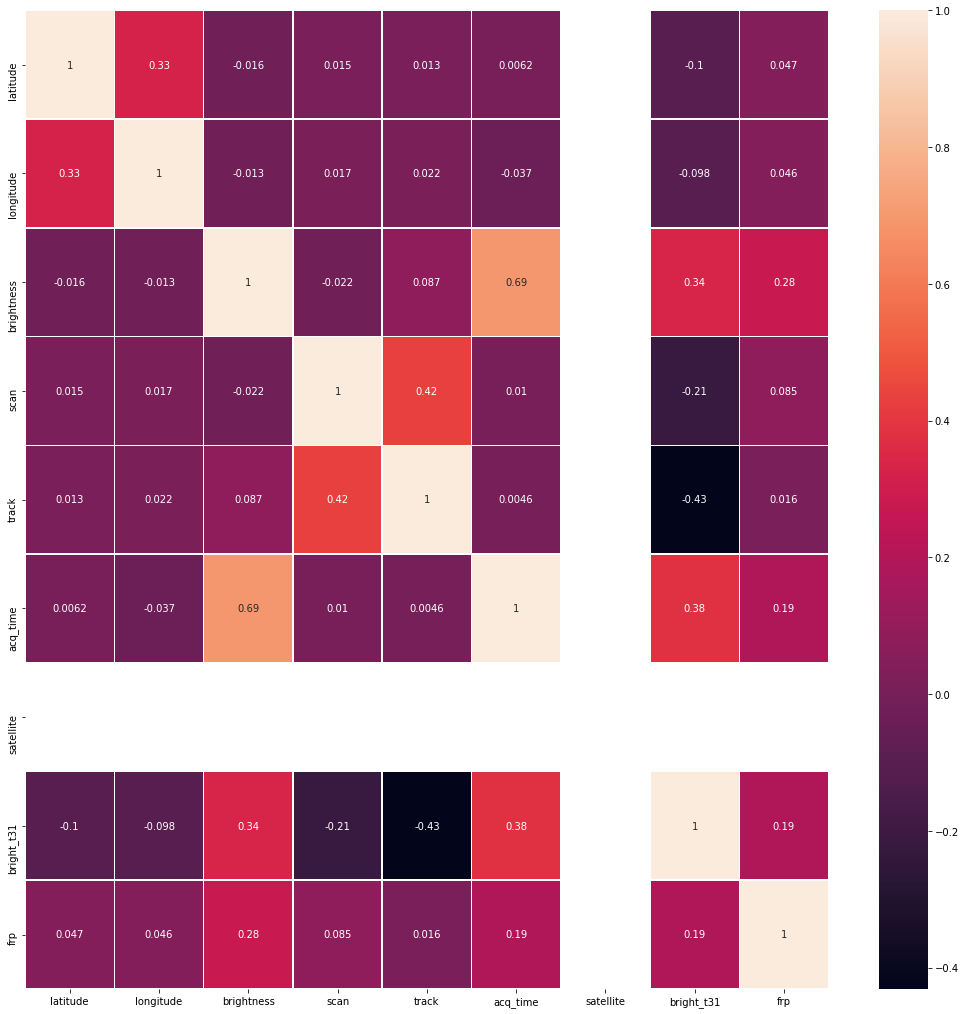

In [7]:
f,ax = plt.subplots(figsize=(18, 18))
print("Plotting correlation:")
sns.heatmap(corr,annot= True, linewidths=.5)

In [8]:
data = dataset.values

X = data[:,0:4]
Y = data[:,4]

In [9]:
extraTreesRegressor = ExtraTreesRegressor()
rfe = RFE(extraTreesRegressor,5)
fit = rfe.fit(X,Y)
print("The number of features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Rankings:", fit.ranking_)

The number of features: 4
Selected Features: [ True  True  True  True]
Feature Rankings: [1 1 1 1]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac3666e518>,
      dtype=object)

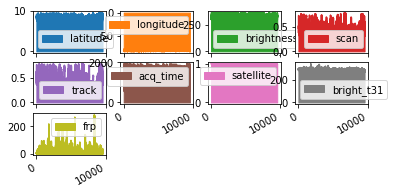

In [14]:
dataset.plot(kind='area', subplots=True, layout=(4,4))

In [15]:
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Linear Regression
Score: 0.1896616472305248
Mean Absolute Error: 0.07729759065931358


In [22]:
print("Ridge Regression")
ridge = Ridge()
ridge.fit(X,Y)
prediction_ridge = ridge.predict(X)
score = explained_variance_score(Y, prediction_ridge)
mae = mean_absolute_error(prediction_ridge, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)


Ridge Regression
Score: 0.1896101694936504
Mean Absolute Error: 0.07727395150687238


In [18]:
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X,Y)
prediction_knreg = knreg.predict(X)
score = explained_variance_score(Y, prediction_knreg)
mae = mean_absolute_error(prediction_knreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

K-Neighbors Regressor
Score: 0.3787900383449828
Mean Absolute Error: 0.06406337586279022


In [19]:
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Random Forest Regressor
Score: 0.9705518753166584
Mean Absolute Error: 0.010158366450533434


In [26]:
print('Support Vector Regressor')
svr = SVR()
svr.fit(X,Y)
prediction_svr = svr.predict(X)
score = explained_variance_score(Y, prediction_svr)
mae = mean_absolute_error(prediction_svr, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Support Vector Regressor
Score: 0.03659727675366231
Mean Absolute Error: 0.08431708298481592
